<h3>Loading and visualizing the digits data</h3>

In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px

In [26]:
df_train = pd.read_csv('train.csv')

In [38]:
df_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df_train.shape

(42000, 785)

<h3>Counting unique labels in the dataframe</h3>

In [5]:
df_train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

<h3>Dataframe unique labels visualization</h3>

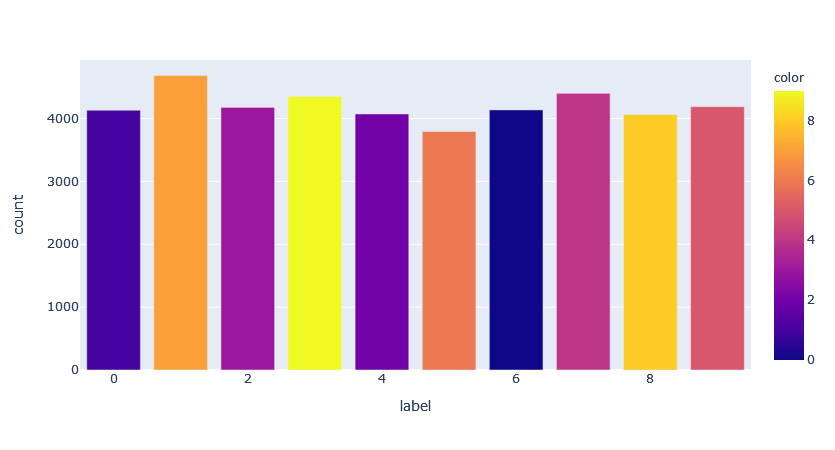

In [6]:
fig = px.bar(df_train['label'].value_counts().sort_index(), 
             color=df_train['label'].value_counts().index,
            labels={
                     "value": "count",
                     "index": "label",
                 }
            )
fig.show()

<h3>For speed here, reduce the number of rows in the data frame by selecting 10% of each label value</h3>

In [7]:
i = []
for j in range(10):
    i.append(j)
    
df_train_cut = df_train.query("label == @i").sample(frac =.10).sort_index()
df_train_cut.shape

(4200, 785)

<h3>Again counting unique labels in the dataframe</h3>

In [8]:
df_train_cut['label'].value_counts().sort_index()

0    403
1    436
2    438
3    431
4    422
5    387
6    416
7    461
8    375
9    431
Name: label, dtype: int64

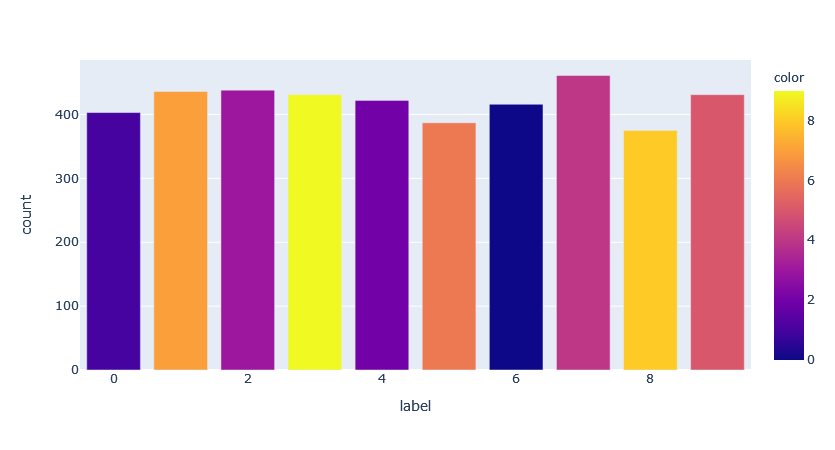

In [9]:
fig = px.bar(df_train_cut['label'].value_counts().sort_index(), 
             color=df_train['label'].value_counts().index,
            labels={
                     "value": "count",
                     "index": "label",
                 }
            )
fig.show()

In [10]:
df_test = pd.read_csv('test.csv')
df_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [11]:
df_test.shape

(28000, 784)

In [13]:
df_train_cut_reshaped = df_train_cut.iloc[:, 1:785].values.reshape(4200,28,28)
df_train_cut_reshaped.shape

(4200, 28, 28)

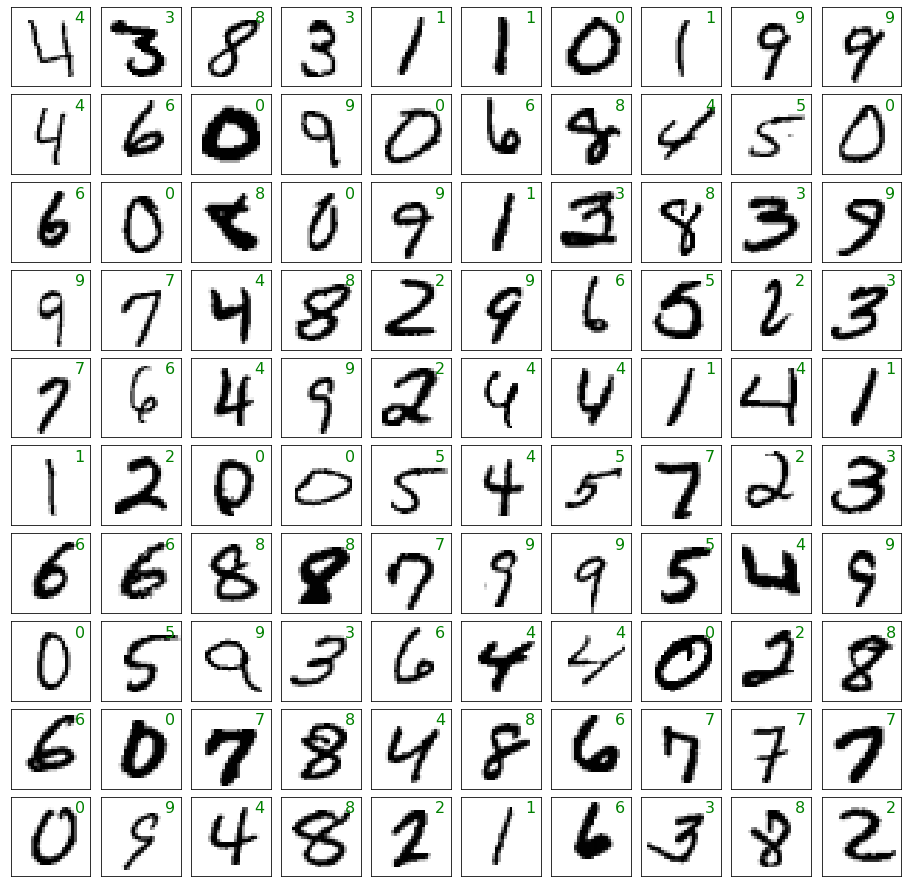

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(16, 16),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(df_train_cut_reshaped[i], cmap='binary',
            interpolation='nearest'),
    ax.text(0.8, 0.8, df_train_cut['label'].to_numpy()[i],
        transform=ax.transAxes, color='green', fontsize=16)

<h3>Data array:</h3>
<h4>We drop 'feature' column from df_train dataset</h4>

In [16]:
X = df_train.iloc[:, 1:785]
X.shape

(42000, 784)

In [17]:
y = df_train['label']
y.shape

(42000,)

<h4>We have 42000 samples and 784 features.</h4>

<h3>Unsupervised learning: Dimensionality reduction</h3>
<h4>We'll reduce the dimensions to 2, using an unsupervised method. We'll make use of a manifold learning algorithm called Isomap, and transform the data to two dimensions:</h4>

In [18]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(df_train_cut.iloc[:, 1:785])
data_projected = iso.transform(df_train_cut.iloc[:, 1:785])
data_projected.shape

(4200, 2)

<h4>We see that the projected data is now two-dimensional. Let's plot this data:</h4>

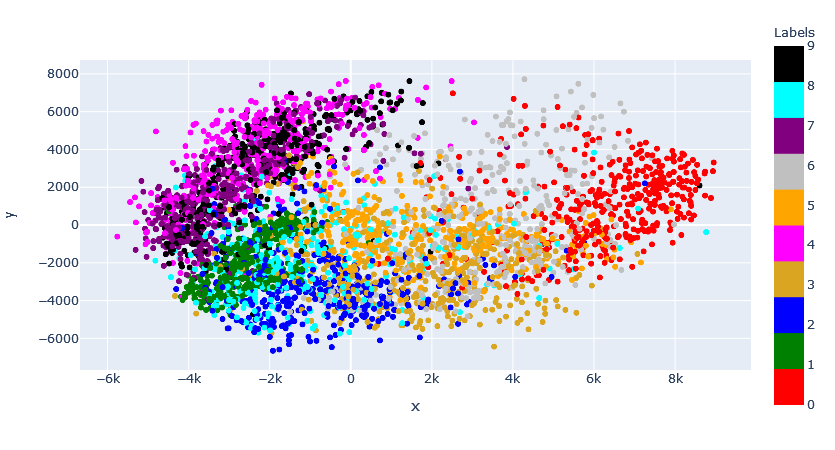

In [20]:
# Convert numpy array to pandas dataframe
df_data_projected = pd. DataFrame(data_projected, columns=['Column1', 'Column2'])

fig = px.scatter(x = df_data_projected['Column1'], y = df_data_projected['Column2'],
                 color=df_train_cut['label'],
                 color_continuous_scale=[
                                             (0.00, "red"),   (0.1, "red"),
                                            (0.1, "green"), (0.2, "green"),
                                            (0.2, "blue"),  (0.3, "blue"),
                                             (0.3, "goldenrod"),  (0.4, "goldenrod"),
                                             (0.4, "magenta"),  (0.5, "magenta"),
                                             (0.5, "orange"),  (0.6, "orange"),
                                             (0.6, "silver"),  (0.7, "silver"),
                                             (0.7, "purple"),  (0.8, "purple"),
                                             (0.8, "cyan"),  (0.9, "cyan"),
                                             (0.9, "black"),  (1.0, "black")
                                        ]
                )

fig.update_layout(coloraxis_colorbar=dict(
    title="Labels",
    tickvals=[0,1,2,3,4,5,6,7,8,9],
    lenmode="pixels", len=400,
))

fig.show()

<h4>We will split the data into a training and testing set, and fit a Bernoulli naive Bayes model:</h4>

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

<h4>Let's gauge accuracy of the model by comparing the true values of the test set to the predictions:</h4>

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8382857142857143

<h2>We have about 83% accuracy for classification of the digits</h2>
<h4>Let's use the confusion matrix to see where we we've gone wrong</h4>

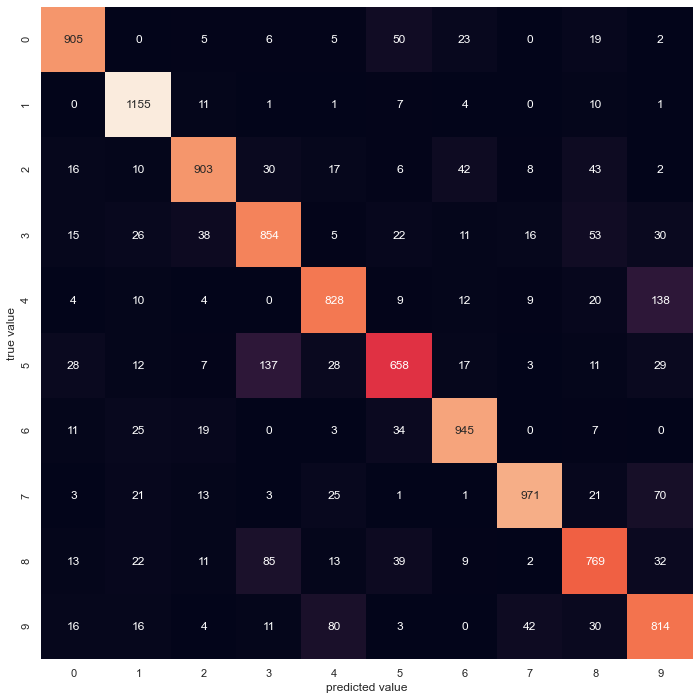

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4>The diagram shows where the numbers are incorrectly labeled: for example,
a large number of fives here are mistakenly classified as threes, and fours as nines.</h4>
<h4>We plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:</h4>

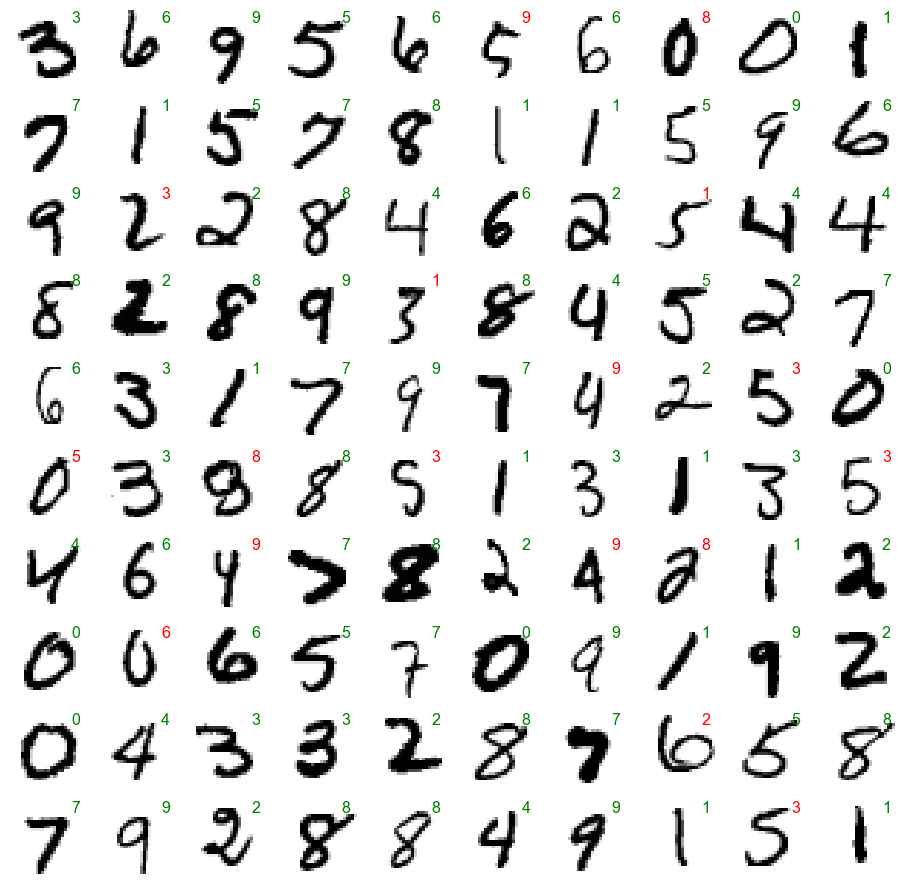

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(16, 16),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.values.reshape(10500,28,28)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.8, 0.8, str(y_model[i]),
            transform=ax.transAxes,
            fontsize=16,
            color='green' if (ytest.to_numpy()[i] == y_model[i]) else 'red'
           )